In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
%matplotlib inline
import os
import re

In [15]:
data = pd.read_excel("Headlines.xlsx")
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [16]:
data = data[['headline','is_sarcastic']]
data.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


Text(0.5, 1.0, 'Sarcasm vs Non-sarcasm')

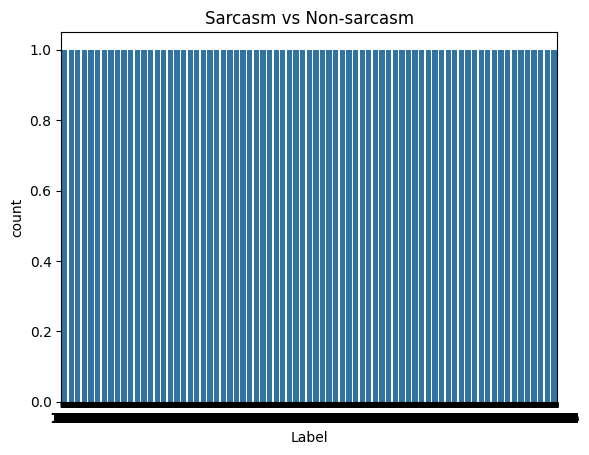

In [17]:
sns.countplot(data.is_sarcastic)
plt.xlabel('Label')
plt.title('Sarcasm vs Non-sarcasm')

In [18]:
data['headline'] = data['headline'].apply(lambda x: x.lower())
data['headline'] = data['headline'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [21]:
for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')
    
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['headline'].values)
X = tokenizer.texts_to_sequences(data['headline'].values)
X = pad_sequences(X)

In [23]:
Y = pd.get_dummies(data['is_sarcastic']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(17895, 29) (17895, 2)
(8814, 29) (8814, 2)


In [24]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

2024-03-04 17:13:24.078146: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 777 MB memory:  -> device: 0, name: A100-SXM4-40GB, pci bus id: 0000:0f:00.0, compute capability: 8.0


In [25]:
batch_size = 32
history = model.fit(X_train, Y_train, epochs = 25, batch_size=batch_size, verbose = 2)

Epoch 1/25


2024-03-04 17:14:14.565583: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fb991293940 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-04 17:14:14.565631: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): A100-SXM4-40GB, Compute Capability 8.0
2024-03-04 17:14:14.570923: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-04 17:14:14.604763: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1709572454.721475   60580 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


560/560 - 44s - loss: 0.4429 - accuracy: 0.7862 - 44s/epoch - 79ms/step
Epoch 2/25
560/560 - 32s - loss: 0.3342 - accuracy: 0.8547 - 32s/epoch - 58ms/step
Epoch 3/25
560/560 - 33s - loss: 0.3002 - accuracy: 0.8696 - 33s/epoch - 59ms/step
Epoch 4/25
560/560 - 32s - loss: 0.2704 - accuracy: 0.8840 - 32s/epoch - 58ms/step
Epoch 5/25
560/560 - 32s - loss: 0.2506 - accuracy: 0.8941 - 32s/epoch - 58ms/step
Epoch 6/25
560/560 - 32s - loss: 0.2329 - accuracy: 0.9001 - 32s/epoch - 57ms/step
Epoch 7/25
560/560 - 32s - loss: 0.2151 - accuracy: 0.9086 - 32s/epoch - 57ms/step
Epoch 8/25
560/560 - 33s - loss: 0.1965 - accuracy: 0.9179 - 33s/epoch - 59ms/step
Epoch 9/25
560/560 - 31s - loss: 0.1818 - accuracy: 0.9253 - 31s/epoch - 56ms/step
Epoch 10/25
560/560 - 32s - loss: 0.1665 - accuracy: 0.9317 - 32s/epoch - 58ms/step
Epoch 11/25
560/560 - 32s - loss: 0.1551 - accuracy: 0.9365 - 32s/epoch - 57ms/step
Epoch 12/25
560/560 - 32s - loss: 0.1425 - accuracy: 0.9414 - 32s/epoch - 57ms/step
Epoch 13/25


In [26]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

229/229 - 2s - loss: 0.9757 - accuracy: 0.8135 - 2s/epoch - 10ms/step
score: 0.98
acc: 0.81


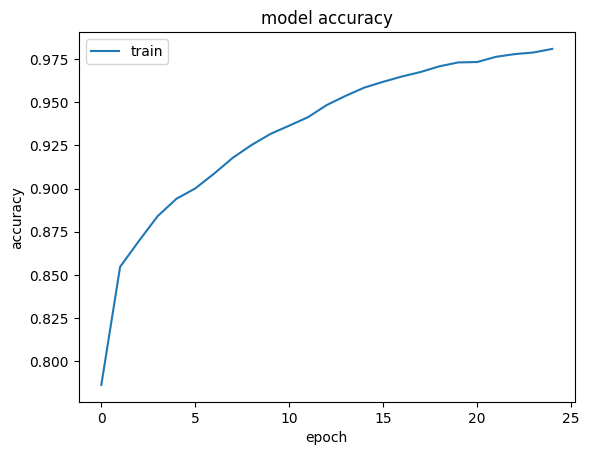

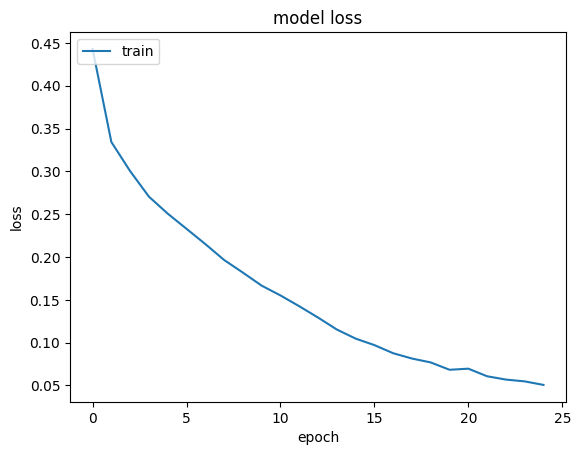

<Figure size 640x480 with 0 Axes>

In [33]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

In [53]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0

for x in range(len(X_validate)):
    result = model.predict(X_validate[x].reshape(1, X_validate.shape[1]), batch_size=1, verbose=0)[0]
    
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1

    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1

print("Sarcasm_acc:", pos_correct / pos_cnt * 100, "%")
print("Non-Sarcasm_acc:", neg_correct / neg_cnt * 100, "%")


Sarcasm_acc: 80.99547511312217 %
Non-Sarcasm_acc: 82.55675029868577 %


In [87]:
headline = ['I am not insulting you.I am describing you.']
headline = tokenizer.texts_to_sequences(headline)
headline = pad_sequences(headline, maxlen=29, dtype='int32',x value=0)

sentiment = model.predict(headline,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("Non-Sarcastic")
elif (np.argmax(sentiment) == 1):
    print("Sarcastic")

1/1 - 0s - 41ms/epoch - 41ms/step
Sarcastic


In [79]:
#Save the model
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")